# Dimensionality Reduction

## 1. Introduction to Dimensionality Reduction

### What is Dimensionality Reduction?

In the realm of machine learning and data analysis, we frequently work with datasets that have a high number of features (dimensions). While more features can potentially provide more information, high-dimensional data often presents several challenges:

- **Curse of Dimensionality**: As the number of dimensions increases, the volume of the feature space grows exponentially, making the data sparse. This sparsity can degrade the performance of machine learning algorithms, as they struggle to find patterns in the data.
- **Computational Complexity**: High-dimensional data increases the computational cost and time for processing and modeling.
- **Overfitting**: Models trained on high-dimensional data can overfit, capturing noise instead of the underlying patterns.
- **Difficulty in Visualization**: Visualizing data beyond three dimensions is non-trivial, limiting our ability to intuitively understand and explore the data.

**Dimensionality Reduction** refers to the process of reducing the number of input variables in a dataset while preserving as much information as possible. This simplification helps in making the data more manageable and can improve the performance of machine learning models.

Dimensionality reduction techniques are broadly categorized into:

- **Feature Selection**: Selecting a subset of the most significant features.
- **Feature Extraction**: Transforming the data into a lower-dimensional space (e.g., using PCA) by creating new features that are combinations of the original features.

### Dataset Description: Fashion MNIST

The **Fashion MNIST** dataset is a popular alternative to the original MNIST dataset of handwritten digits. It contains 70,000 grayscale images of fashion items, each of size 28x28 pixels. There are 10 categories/classes:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

Each image is represented as a 784-dimensional vector (since 28x28 = 784), making it suitable for demonstrating PCA on high-dimensional data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, Y_train), (X_test, y_test) = fashion_mnist.load_data()

X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([Y_train, y_test], axis=0)

X_flattened = X.reshape(X.shape[0], -1)
print(f"Data shape: {X_flattened.shape}")  # Should be (70000, 784)
print(f"Labels shape: {y.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data shape: (70000, 784)
Labels shape: (70000,)


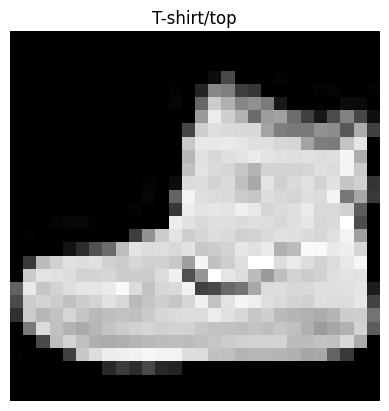

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(X[0], cmap='gray')
plt.title(class_names[0])
plt.axis('off')
plt.show()

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)
print(f"Standardized Data Shape: {X_scaled.shape}")

Standardized Data Shape: (70000, 784)


In [5]:
n_samples = X_scaled.shape[0]
cov_matrix = np.dot(X_scaled.T, X_scaled) / (n_samples  - 1)
print(f"Covariance Matrix Shape: {cov_matrix.shape}")
print("-"*60)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix Shape: (784, 784)
------------------------------------------------------------
Covariance Matrix:
[[1.00001429 0.25569492 0.06403707 ... 0.00832096 0.02411277 0.03740479]
 [0.25569492 1.00001429 0.67031323 ... 0.03704472 0.02827681 0.01687575]
 [0.06403707 0.67031323 1.00001429 ... 0.04097211 0.01920525 0.01368401]
 ...
 [0.00832096 0.03704472 0.04097211 ... 1.00001429 0.64789485 0.2373563 ]
 [0.02411277 0.02827681 0.01920525 ... 0.64789485 1.00001429 0.49068852]
 [0.03740479 0.01687575 0.01368401 ... 0.2373563  0.49068852 1.00001429]]


In [6]:
U, S, VT = np.linalg.svd(X_scaled, full_matrices=False)

eig_values = (S ** 2) / (n_samples - 1)

eig_vectors = VT.T

print(f"Eigen Values shape: {eig_values.shape}")
print(f"Eigen Vectors shape: {eig_vectors.shape}")

Eigen Values shape: (784,)
Eigen Vectors shape: (784, 784)


In [7]:
paired_eigs = [(eig_values[i], eig_vectors[:, i]) for i in range(len(eig_values))]

paired_eigs.sort(key=lambda x: x[0], reverse=True)

sorted_eig_values = np.array([paired_eig[0] for paired_eig in paired_eigs])
sorted_eig_vectors = np.array([paired_eig[1] for paired_eig in paired_eigs]).T

print('Top 10 Eigen Values:')
for i in range(10):
  print(f'Eigenvalue {i+1}: {sorted_eig_values[i]}')

Top 10 Eigen Values:
Eigenvalue 1: 173.20604322401957
Eigenvalue 2: 112.91803609912589
Eigenvalue 3: 42.83391428357308
Eigenvalue 4: 39.90549263199963
Eigenvalue 5: 31.793060163590866
Eigenvalue 6: 23.63858355275507
Eigenvalue 7: 21.57129594685968
Eigenvalue 8: 18.162981328926396
Eigenvalue 9: 13.308333146651536
Eigenvalue 10: 10.359932413094768


In [8]:
k = 2
matrix_w = sorted_eig_vectors[:, :k]

X_pca = X_scaled.dot(matrix_w)

principal_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(k)])
principal_df['label'] = y

print("Projected Data (first 5 samples):")
print('-'*50)
print(principal_df.head())

Projected Data (first 5 samples):
--------------------------------------------------
         PC1        PC2  label
0  -0.824695  20.862604      9
1  17.073390  -4.966217      0
2  -9.600036 -12.321928      0
3  -0.310827 -11.590370      3
4   8.975907 -12.880551      0


Explained Variance Ratio for Top 10 Components:
PC1: 0.2209
PC2: 0.1440
PC3: 0.0546
PC4: 0.0509
PC5: 0.0406
PC6: 0.0302
PC7: 0.0275
PC8: 0.0232
PC9: 0.0170
PC10: 0.0132


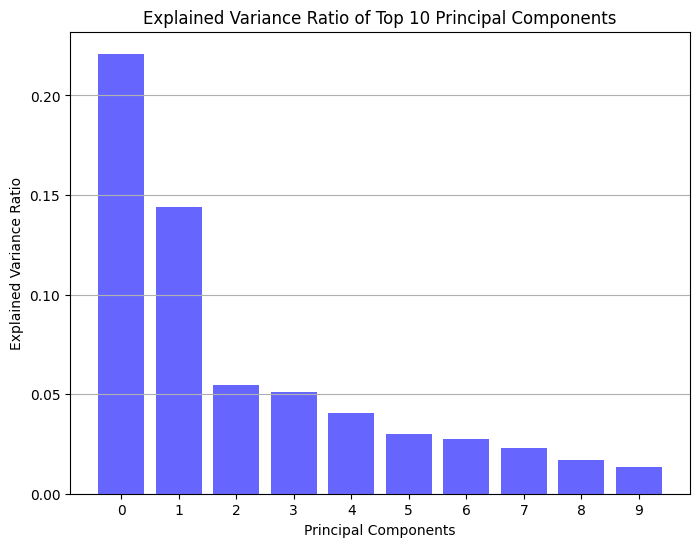

In [9]:
explained_variance_ratio = sorted_eig_values / sorted_eig_values.sum()

print("Explained Variance Ratio for Top 10 Components:")
for i in range(10):
  print(f"PC{i+1}: {explained_variance_ratio[i]:.4f}")

plt.figure(figsize=(8,6))
components = np.arange(10)
plt.bar(components, explained_variance_ratio[:10], color='blue', alpha=0.6)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Top 10 Principal Components')
plt.xticks(components)
plt.grid(axis='y')
plt.show()

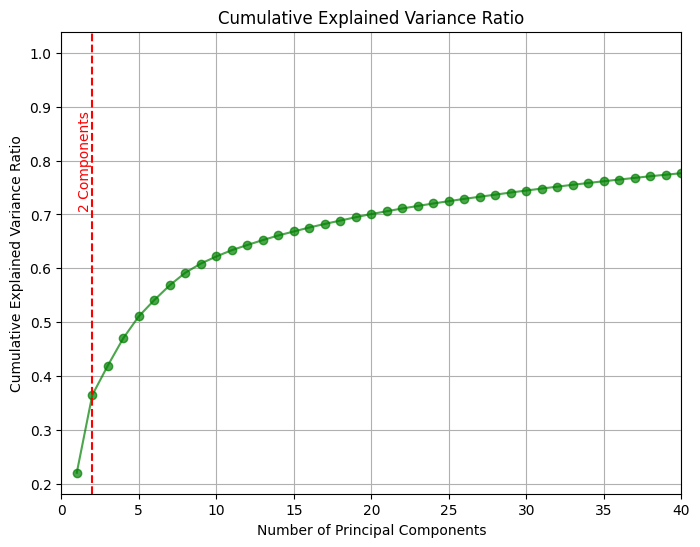

In [10]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, color='green', ls='-', alpha=0.7, marker='o')
plt.axvline(2, ls='--', color='red')
plt.text(2, 0.8, '2 Components', rotation=90, va='center', ha='right', color='red')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.xlim(0, 40)
plt.grid(True)
plt.show()

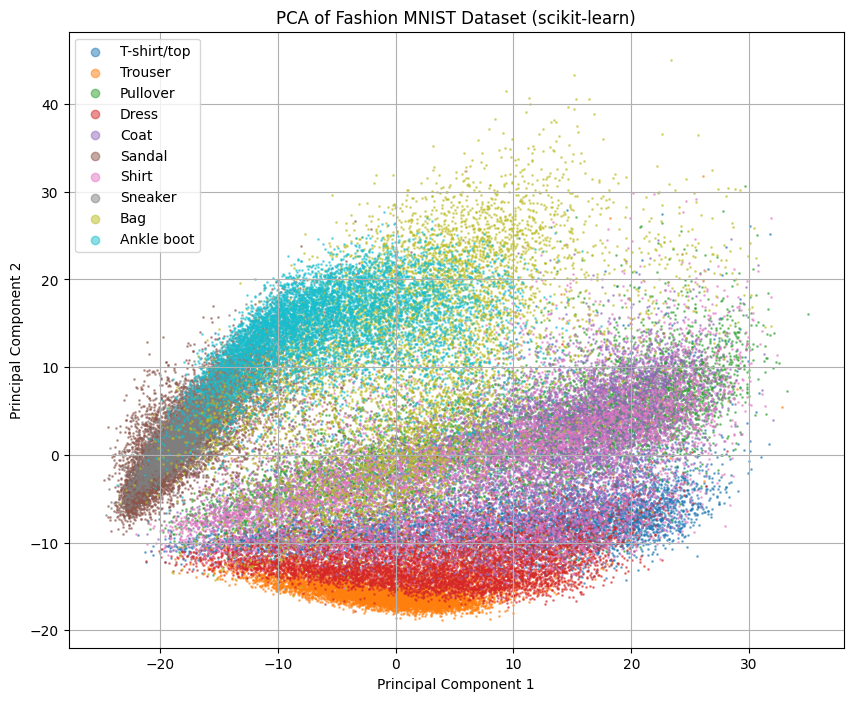

In [11]:
plt.figure(figsize=(10,8))

for label in np.unique(y):
  data = principal_df[principal_df['label'] == label]
  plt.scatter(
      data['PC1'],
      data['PC2'],
      s=1, alpha=0.5,
      label=class_names[label]
  )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset (scikit-learn)')
plt.legend(markerscale=6)
plt.grid()
plt.show()

In [13]:
# Import PCA from scikit-learn
from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components
k = 2  # Number of principal components
pca = PCA(n_components=k)

# Fit PCA on the standardized data
X_pca_sklearn = pca.fit_transform(X_scaled)

# Create a DataFrame with the projected data
principal_df_sklearn = pd.DataFrame(X_pca_sklearn, columns=[f'PC{i+1}' for i in range(k)])
principal_df_sklearn['label'] = y

# Display the explained variance ratio
print("Explained Variance Ratio by scikit-learn PCA:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

Explained Variance Ratio by scikit-learn PCA:
PC1: 0.2209
PC2: 0.1440


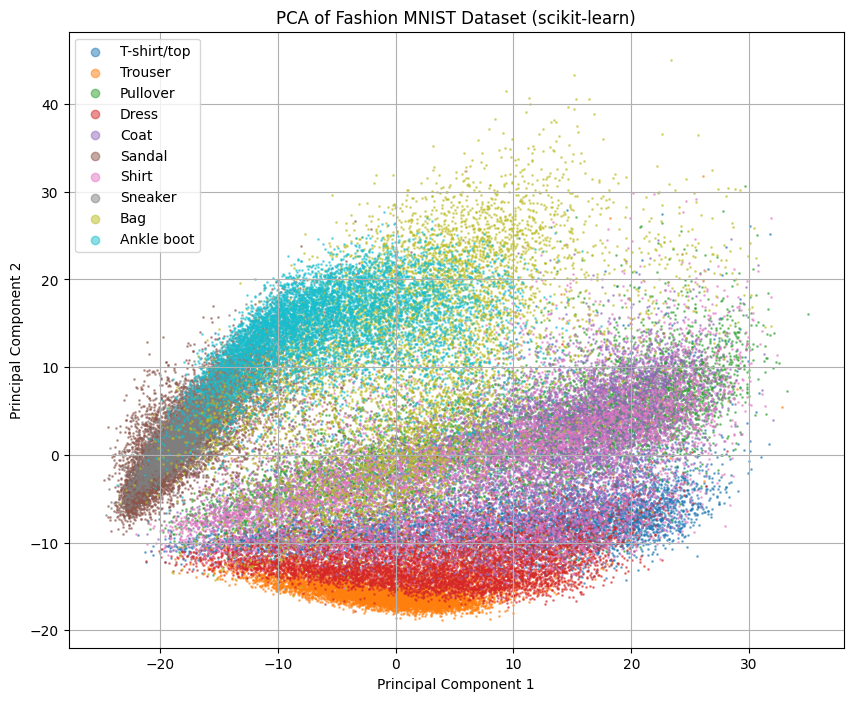

In [14]:
# Plot the projected data using scikit-learn PCA
plt.figure(figsize=(10, 8))

# No sampling - use the entire dataset
for label in np.unique(principal_df_sklearn['label']):
    label_indices = principal_df_sklearn['label'] == label
    plt.scatter(principal_df_sklearn.loc[label_indices, 'PC1'],
                principal_df_sklearn.loc[label_indices, 'PC2'],
                s=1, alpha=0.5, label=class_names[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset (scikit-learn)')
plt.legend(markerscale=6)
plt.grid()
plt.show()

In [15]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

leukemia = fetch_openml(data_id=1104, as_frame=False)
X = leukemia.data
y = leukemia.target

le = LabelEncoder()
encoded_y = le.fit_transform(y)

print(f"Data shape: {X.shape}")
print(f"Number of Classes: {len(np.unique(encoded_y))}")

Data shape: (72, 7129)
Number of Classes: 2


In [16]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [17]:
model = LogisticRegression(max_iter=1000, solver='saga')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_without_pca = cross_val_score(model, scaled_X, encoded_y, cv=cv, scoring='accuracy')
mean_scores_without_pca = np.mean(scores_without_pca)
print(f"\nCross-validation accuracy without PCA: {mean_scores_without_pca:.4f}")


Cross-validation accuracy without PCA: 0.8495


In [18]:
pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(scaled_X)

pca_scores = cross_val_score(model, X_pca, encoded_y, cv=cv, scoring='accuracy')
mean_pca_scores = np.mean(pca_scores)

print(f"Cross-validation accuracy with PCA (20 components): {mean_pca_scores:.4f}")

Cross-validation accuracy with PCA (20 components): 0.9029


In [19]:
components = [2, 3, 4, 5, 6, 7, 10, 15, 20, 50]
scores = []

for n in components:
  pca = PCA(n_components=n, random_state=42)
  x_pca = pca.fit_transform(scaled_X)
  score = np.mean(cross_val_score(model, x_pca, encoded_y, cv=cv, scoring='accuracy'))
  scores.append(score)

  print(f"Accuracy with PCA ({n} components): {score:.4f}")

Accuracy with PCA (2 components): 0.7352
Accuracy with PCA (3 components): 0.7771
Accuracy with PCA (4 components): 0.9305
Accuracy with PCA (5 components): 0.9314
Accuracy with PCA (6 components): 0.9171
Accuracy with PCA (7 components): 0.9029
Accuracy with PCA (10 components): 0.8905
Accuracy with PCA (15 components): 0.9029
Accuracy with PCA (20 components): 0.9029
Accuracy with PCA (50 components): 0.8752


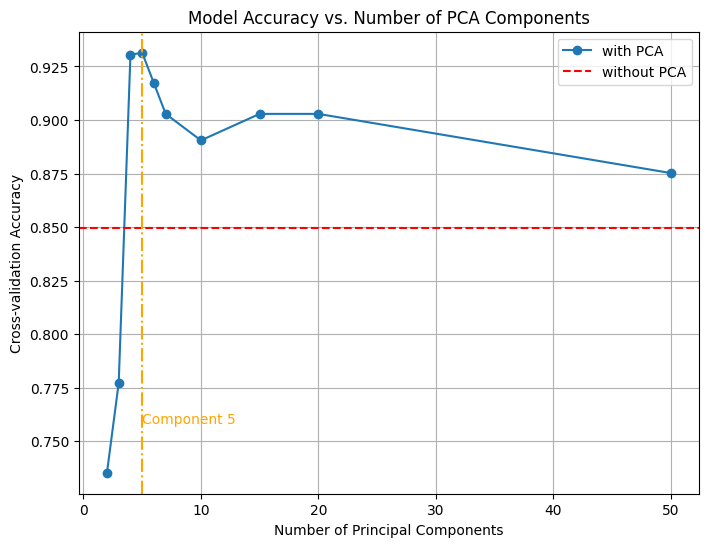

In [20]:
plt.figure(figsize=(8,6))
plt.plot(components, scores, marker='o', label='with PCA')
plt.axhline(y=mean_scores_without_pca, ls='--', color='red', label='without PCA')
plt.axvline(x=5, ls='-.', color='orange')
plt.text(5, 0.76, 'Component 5', va='center', color='orange')
plt.title('Model Accuracy vs. Number of PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
!pip install umap-learn

In [22]:
from sklearn.manifold import TSNE
import umap.umap_ as umap

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target
print(f'shape X: {X.shape}', f'shape y:{y.shape}', sep='\n')
print(f'Type of target column: {y.dtype}')

shape X: (70000, 784)
shape y:(70000,)
Type of target column: category


In [23]:
y = y.astype(int)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

sample_size = 2000
num_classes = len(np.unique(y))

samples_per_class = sample_size // num_classes

# Ensure sample_size is divisible by num_classes
sample_size = samples_per_class * num_classes
print(f"Total sample size adjusted to {sample_size} to evenly distribute among classes.")

Total sample size adjusted to 2000 to evenly distribute among classes.


In [24]:
indices_list= []

np.random.seed(42)

for class_label in np.unique(y):
  class_indices = np.where(y == class_label)[0]
  selected_indices = np.random.choice(class_indices, size=samples_per_class, replace=False)
  indices_list.extend(selected_indices)

indices = np.array(indices_list)

np.random.shuffle(indices)

X_sample = scaled_X[indices]
y_sample = y[indices]

print(f"Sampled data shape: {X_sample.shape}")
print(f"Sampled labels distribution: {np.bincount(y_sample)}")

Sampled data shape: (2000, 784)
Sampled labels distribution: [200 200 200 200 200 200 200 200 200 200]


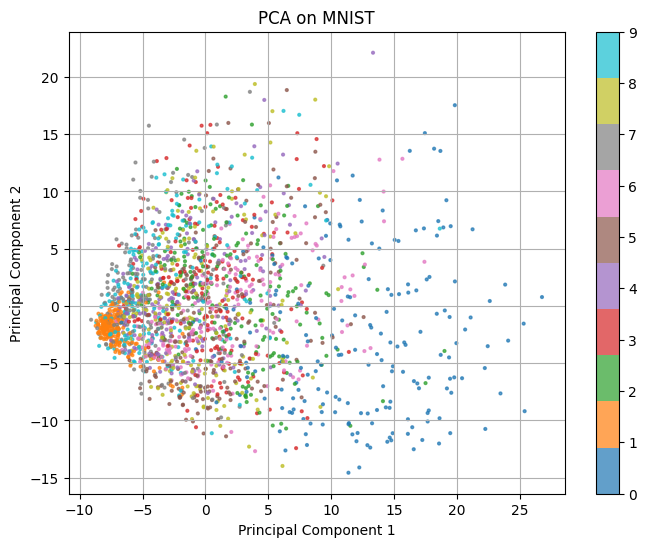

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='tab10', s=4, alpha=0.7)
plt.title('PCA on MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(10))
plt.grid(True)
plt.show()

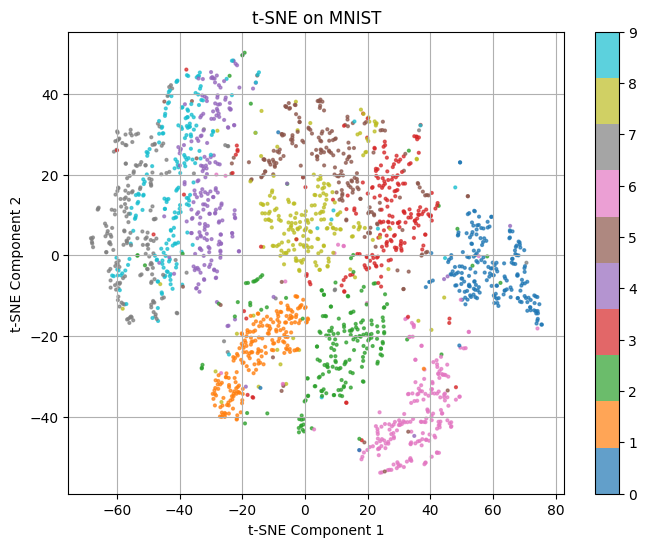

In [26]:
tsne = TSNE(n_components=2, random_state=42, perplexity=20, n_iter=1000)
X_tsne = tsne.fit_transform(X_sample)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='tab10', s=4, alpha=0.7)
plt.title('t-SNE on MNIST')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, ticks=range(10))
plt.grid(True)
plt.show()

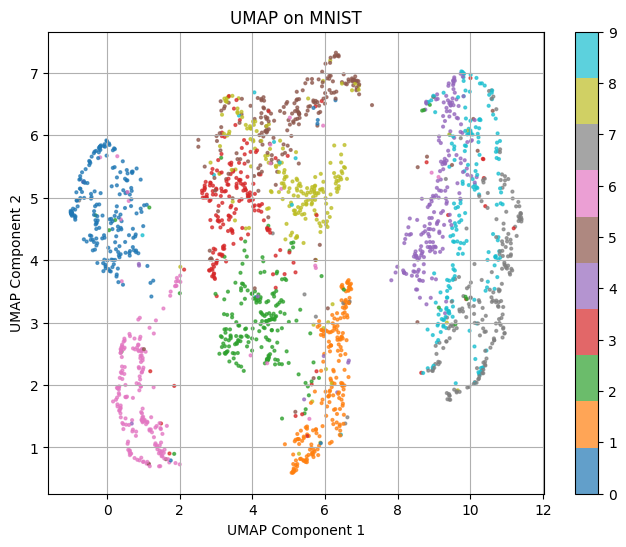

In [27]:
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_sample)

# Plot the UMAP result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sample, cmap='tab10', s=4, alpha=0.7)
plt.title('UMAP on MNIST')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter, ticks=range(10))
plt.grid(True)
plt.show()